In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
df=pd.read_csv('rolling_stones_spotify.csv')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [3]:
df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [4]:
df.shape

(1610, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [6]:
continuous_var=[x for x in df if df[x].dtypes != 'O']

In [7]:
categorical_var=[x for x in df if x not in continuous_var]

In [8]:
print(continuous_var)
print('-----------------------')
print(categorical_var)

['Unnamed: 0', 'track_number', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']
-----------------------
['name', 'album', 'release_date', 'id', 'uri']


In [9]:
df.drop(['id','uri','Unnamed: 0'],axis=1,inplace=True)

In [10]:
df.shape

(1610, 15)

In [11]:
df_excel=pd.read_excel('Data Dictionary - Creating cohorts of songs.xlsx')
df_excel

,Variable,Description
0,name,the name of the song
1,album,the name of the album
2,release_date,the day month and year the album was released
3,track number,the order the song appears on the album
4,id,the Spotify id for the song
5,uri,the Spotify uri for the song
6,acousticness,A confidence measure from 0.0 to 1.0 of whethe...
7,danceability,Danceability describes how suitable a track is...
8,energy,Energy is a measure from 0.0 to 1.0 and repres...
9,instrumentalness,"Predicts whether a track contains no vocals. ""..."


# Data inpection and cleaning

In [12]:
df[df.duplicated()==True]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2.643,0.0898,71.995,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1.568,0.1880,162.428,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4.386,0.1280,105.124,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5.145,0.0292,72.648,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5.871,0.0390,127.329,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8.007,0.0406,115.870,0.336,13,95626


In [13]:
df=df.drop_duplicates()
df

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,Tell Me,The Rolling Stones,1964-04-16,9,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [14]:
df.shape

(1604, 15)

- <b>Duplicate entries is dropped from the dataframe.</b>

In [15]:
df.isna().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

- <b>THERE IS NO MISSING VALUES.</b>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1604 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1604 non-null   object 
 1   album             1604 non-null   object 
 2   release_date      1604 non-null   object 
 3   track_number      1604 non-null   int64  
 4   acousticness      1604 non-null   float64
 5   danceability      1604 non-null   float64
 6   energy            1604 non-null   float64
 7   instrumentalness  1604 non-null   float64
 8   liveness          1604 non-null   float64
 9   loudness          1604 non-null   float64
 10  speechiness       1604 non-null   float64
 11  tempo             1604 non-null   float64
 12  valence           1604 non-null   float64
 13  popularity        1604 non-null   int64  
 14  duration_ms       1604 non-null   int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 200.5+ KB


- <b>There are no irrelevant entries.</b>

In [17]:
def outlier(df,x):
    q1=df[x].quantile(0.25)
    q3=df[x].quantile(0.75)
    iqr=q3-q1
    df=df.loc[~((df[x]<(q1-1.5*iqr))|(df[x]>(q3+1.5*iqr))),]
    return df

In [18]:
df=outlier(df,'instrumentalness')
df=outlier(df,'popularity')
df=outlier(df,'loudness')
df=outlier(df,'duration_ms')
df=outlier(df,'loudness')
df=outlier(df,'liveness')
df=outlier(df,'speechiness')
df=outlier(df,'danceability')
df=outlier(df,'acousticness')
df=outlier(df,'tempo')
df=outlier(df,'valence')

In [19]:
df.shape

(1122, 15)

- <b>All the outliers have been removed from the data.</b>

# Exploratory Data Analysis and Feature Engineering

## The 2 most recommended albums

In [20]:
df_album=df.groupby(['album'])['popularity'].mean()
df_album

album
12 X 5                              32.428571
12 x 5                               5.125000
A Bigger Bang (2009 Re-Mastered)    27.062500
A Bigger Bang (Live)                18.000000
Aftermath                           35.333333
                                      ...    
Undercover                          19.857143
Undercover (2009 Re-Mastered)       24.666667
Voodoo Lounge (Remastered 2009)     33.076923
Voodoo Lounge Uncut (Live)          11.861111
got LIVE if you want it!            16.000000
Name: popularity, Length: 88, dtype: float64

In [21]:
df_album=df_album.reset_index()
df_album

,album,popularity
0,12 X 5,32.428571
1,12 x 5,5.125000
2,A Bigger Bang (2009 Re-Mastered),27.062500
3,A Bigger Bang (Live),18.000000
4,Aftermath,35.333333
...,...,...
83,Undercover,19.857143
84,Undercover (2009 Re-Mastered),24.666667
85,Voodoo Lounge (Remastered 2009),33.076923
86,Voodoo Lounge Uncut (Live),11.861111


In [22]:
df_album=pd.DataFrame(df_album)
df_album

,album,popularity
0,12 X 5,32.428571
1,12 x 5,5.125000
2,A Bigger Bang (2009 Re-Mastered),27.062500
3,A Bigger Bang (Live),18.000000
4,Aftermath,35.333333
...,...,...
83,Undercover,19.857143
84,Undercover (2009 Re-Mastered),24.666667
85,Voodoo Lounge (Remastered 2009),33.076923
86,Voodoo Lounge Uncut (Live),11.861111


In [23]:
df_album=df_album.sort_values('popularity',ascending=0)
df_album=df_album.head(10)
df_album

,album,popularity
66,Sticky Fingers (Remastered),42.333333
59,Some Girls,42.333333
72,Tattoo You (2009 Re-Mastered),40.125000
26,Exile On Main Street (2010 Re-Mastered),39.750000
7,Beggars Banquet (50th Anniversary Edition),38.500000
44,Let It Bleed (50th Anniversary Edition / Remas...,37.000000
12,Black And Blue (Remastered 2009),36.428571
4,Aftermath,35.333333
13,Blue & Lonesome,35.125000
55,Out Of Our Heads,33.500000


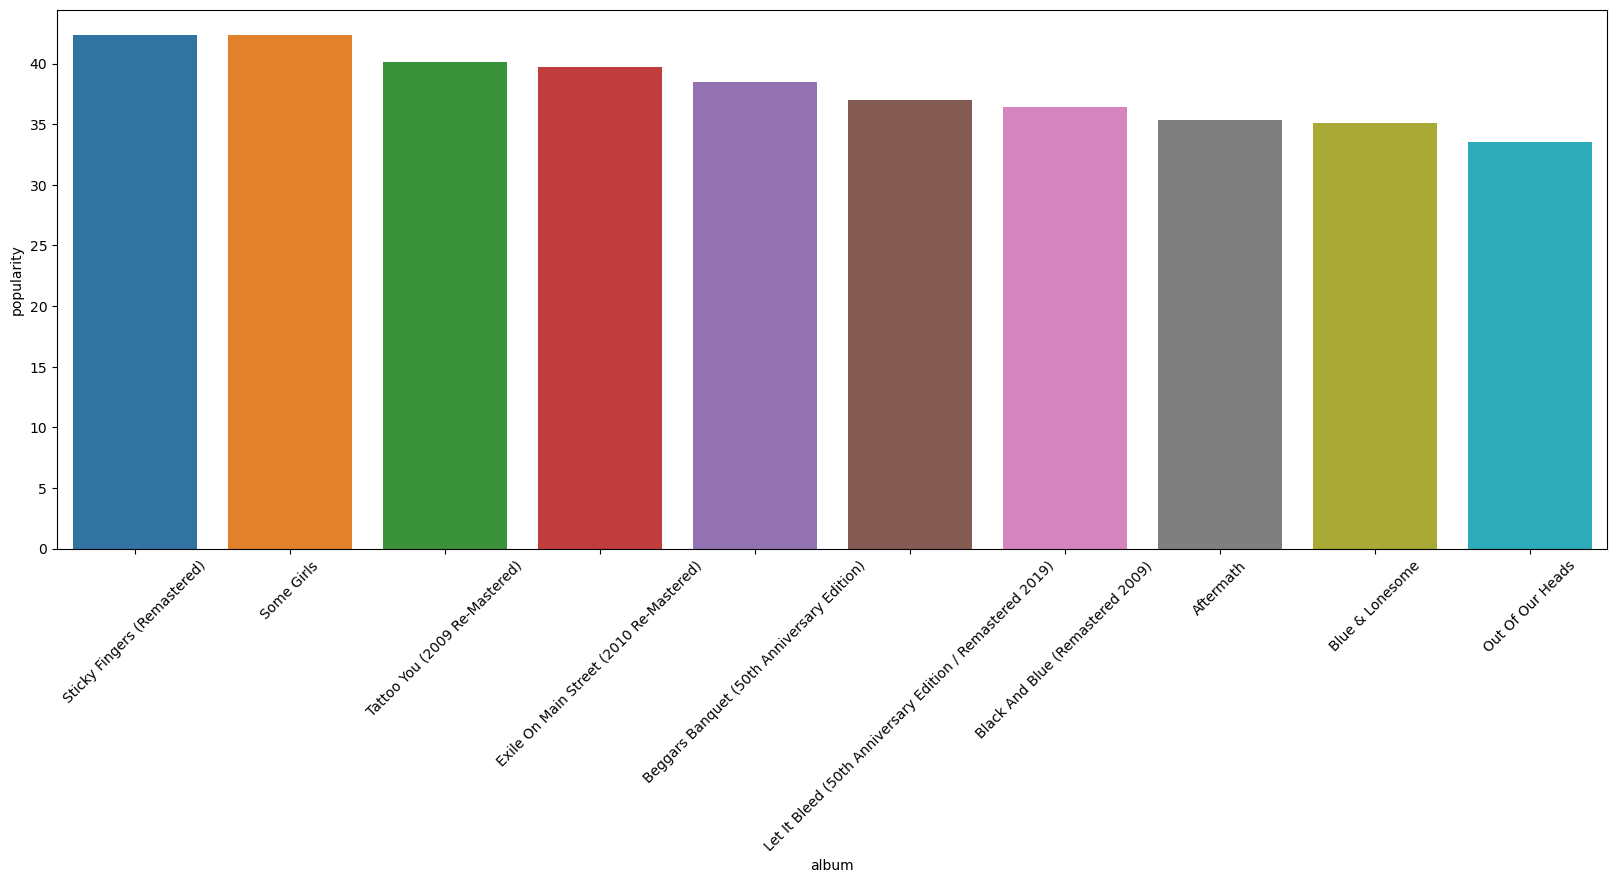

In [24]:
plt.figure(figsize=(20,7))
sns.barplot(data=df_album,x='album',y='popularity',estimator=np.sum)
plt.xticks(rotation=45)
plt.show()

- <b>Sticky Fingers (Remastered) and Some Girls are the two albums that should be recommended to anyone.</b>

## Features and patterns of songs

- <b>The features are from the 5th column of the dataframe, so visualising them using iloc function.<b>

In [25]:
df_ftr=df.iloc[:,4:15]
df_ftr

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
1,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.318,34,253173
2,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.313,34,263160
4,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.206,32,305106
5,0.2750,0.340,0.956,0.125000,0.7410,-5.539,0.0915,101.628,0.125,31,244293
6,0.5610,0.262,0.810,0.000003,0.9720,-6.851,0.0969,77.520,0.394,31,245506
...,...,...,...,...,...,...,...,...,...,...,...
1605,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.967,39,154080
1606,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.446,36,245266
1607,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.835,30,176080
1608,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.532,27,121680


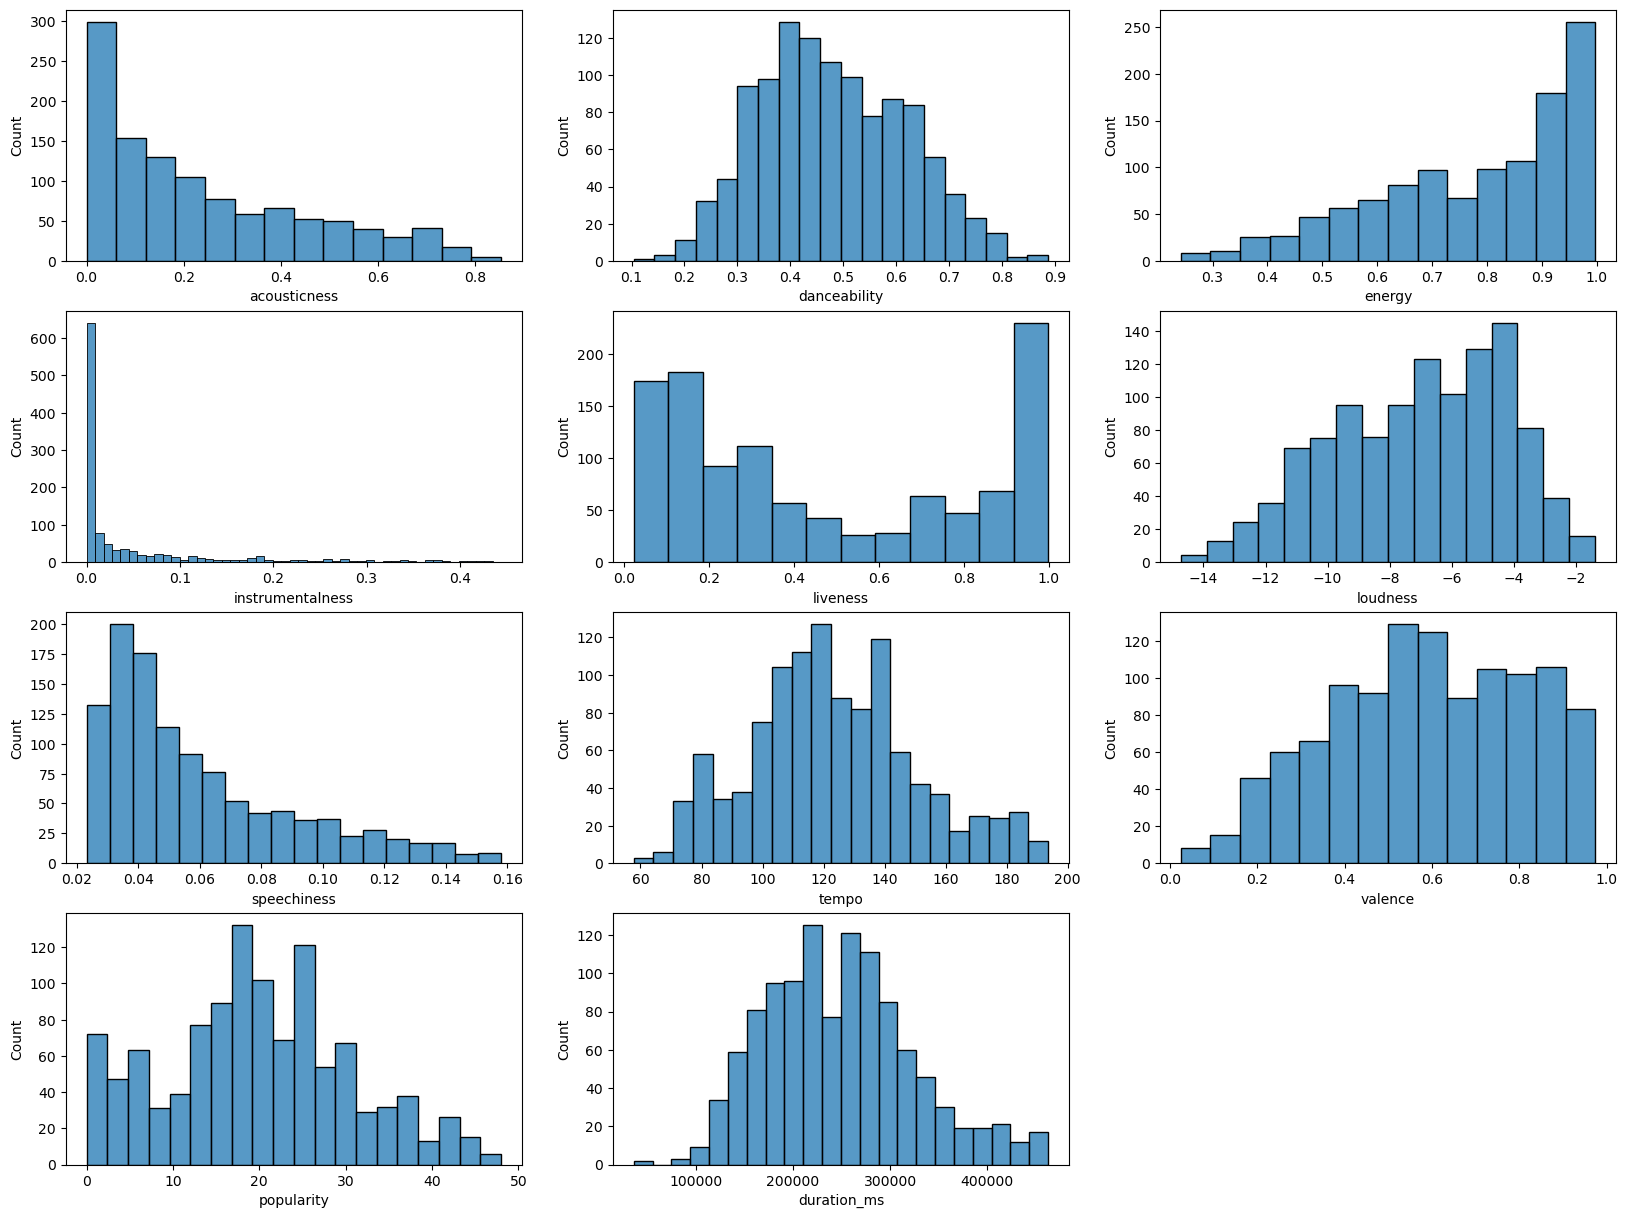

In [26]:
plt.figure(figsize=(20,15))
for i,column in enumerate(df_ftr.columns,1):
    plt.subplot(4,3,i)
    sns.histplot(df_ftr[column])
plt.show()

- <b>The above graphs show that instrumentalness and speechiness are skewed where the data mostly lies around 0.</b>

## Correlation of song popularity with other factors

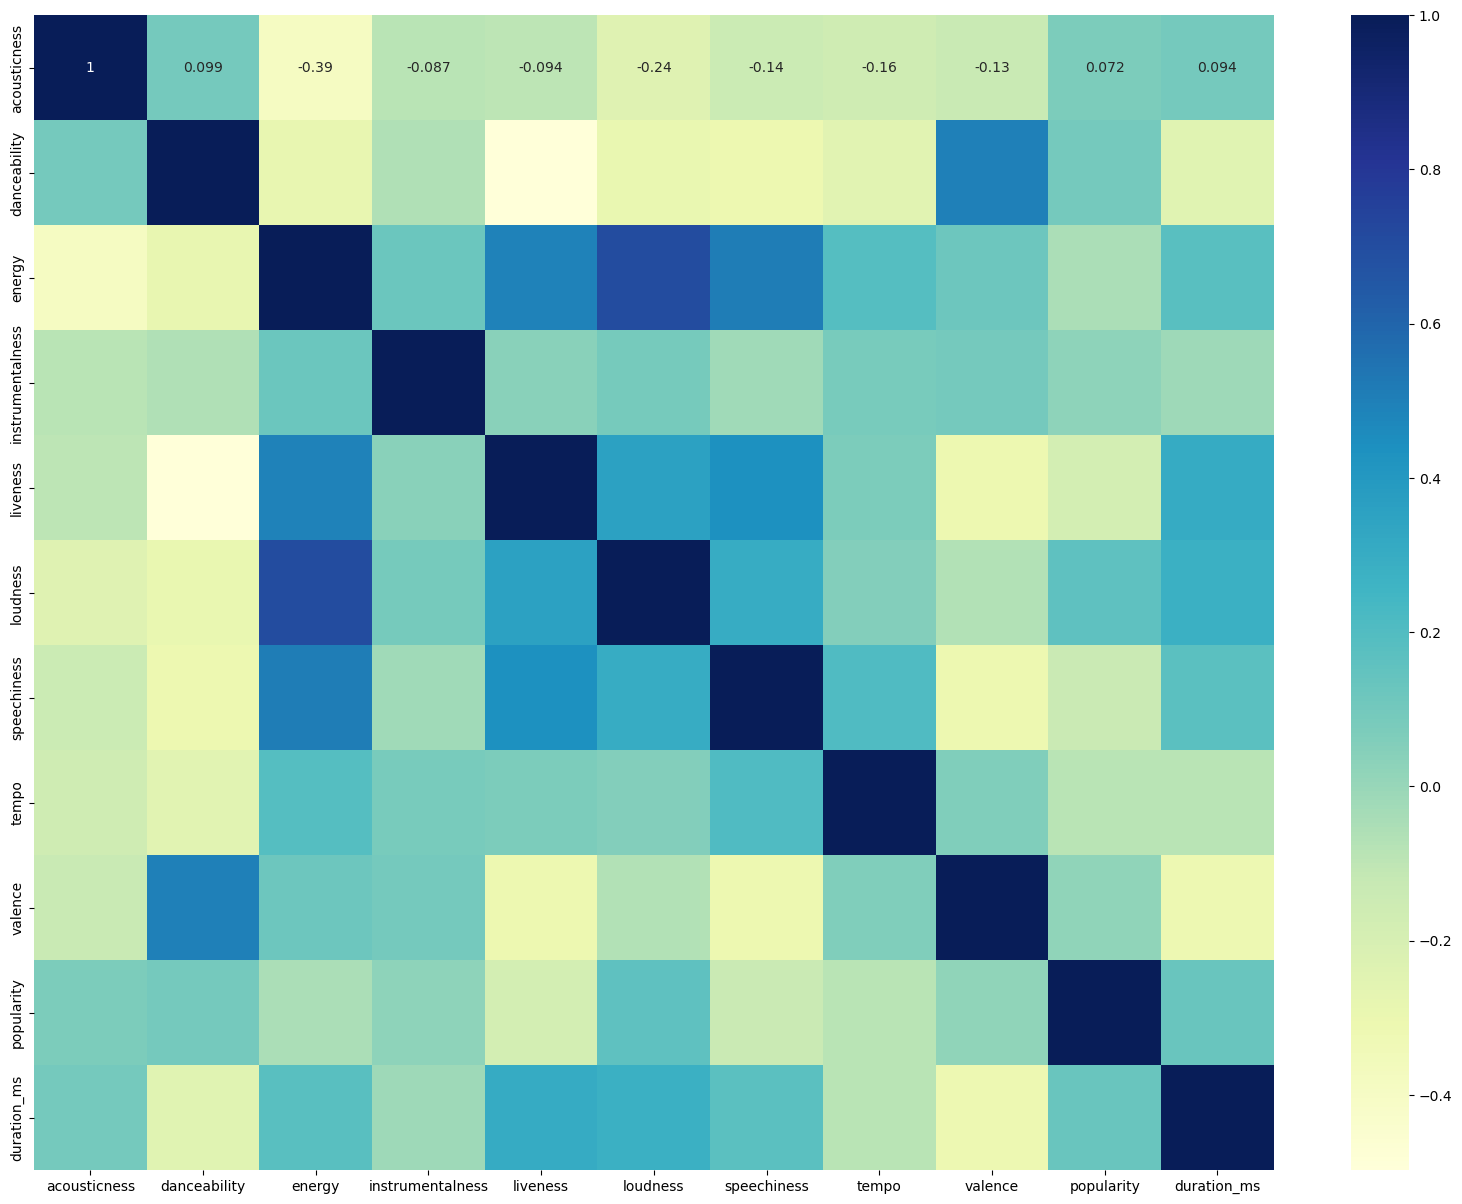

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(df_ftr.corr(),annot=True,cmap='YlGnBu')
plt.show()

- <b>There is hardly any correlation of popularity with the other factors as shown in the above heatmap.</b>

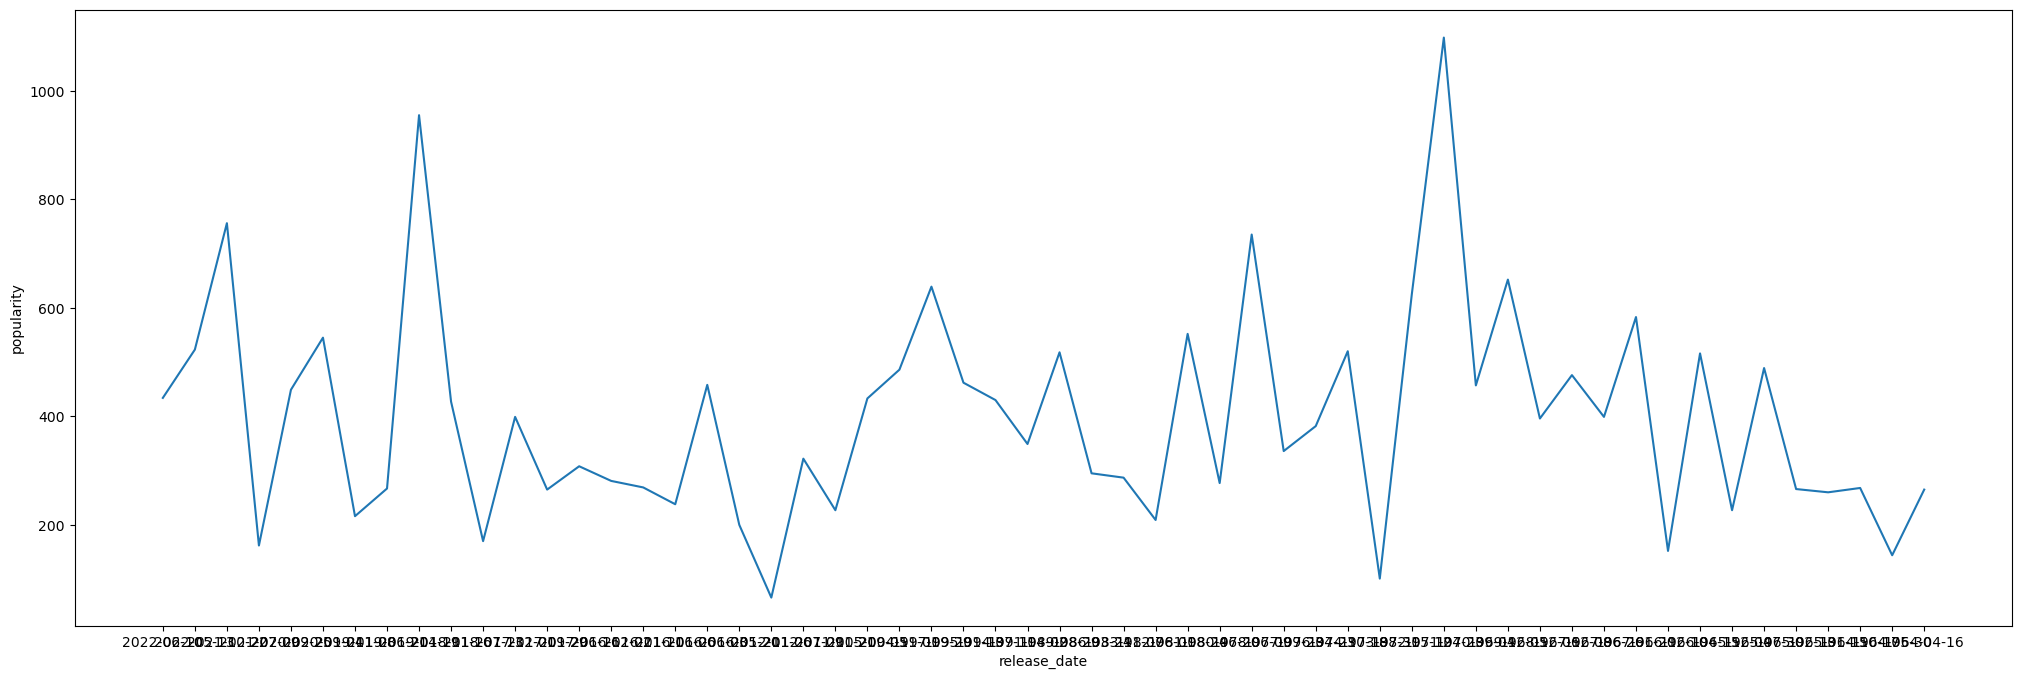

In [28]:
plt.figure(figsize=(25,8))
sns.lineplot(data=df,x='release_date',y='popularity',estimator=np.sum,ci=None)
plt.show()

- <b>The popularity is average from release_date.It doesn't depict any particular trend.</b>

## Dimensionality Reduction Techniques

Dimensionality reduction is defined as a method of reducing variables in a training dataset used to develop machine learning models. 

Dimensionality reduction helps with high dimensional data problems, while trying to preserve most of the relevant information in the data needed to learn accurate, predictive models. There are often too many factors on the basis of which the final prediction is done. These factors are basically variables called features. The higher the number of features, the harder it gets to visualize the training set and then work on it. Sometimes, most of these features are correlated, and hence redundant. This is where dimensionality reduction algorithms come into play.

When the number of features/variables is very large relative to the number of observations in your dataset, certain algorithms struggle to train effective models. This is called the “Curse of Dimensionality”.

Dimensionality reduction techniques can further broadly classified into two categories:
    1. Feature selection - Feature selection is a method introduced to remove less significant features from the data,so that the model is trained only on the features that contribute most to the prediction(dependent) variable. It includes methods such as Filter, Wrapper and Embedded.
    2. Feature extraction - Feature extraction is a process by which an initial set of raw data is reduced to more manageable groups for processing. It is basically done with image and text data, where only the important feature is extracted and sent ahead for processing instead of taking the whole data. It includes methods such as Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), Kernel PCA (K-PCA), and Quadratic Discriminant Analysis (QCA).

Importance of Dimensionality reduction techniques are:
    1. It helps data compression by reducing features.
    2. It makes machine learning algorithms computationally efficient.
    3. It allows the data to take up less storage space as well as it reduces the computation times.
    4. It helps in removing multi-collinearity in data which improves the interpretation of the parameters of the machine learning model.
    5. It reduces the data to 2d or 3d array which becomes easier to visualise the data.
    6. It avoids the curse of dimensionality.

There are significant usage of these techniques but using them may lead to the loss of information, which might impact the other algorithms later on. Moreover accuracy is also compromised as reducing the size of the dataset might remove important information that is needed for accurate predictions.

# Cluster Analysis

- <b>For cluster analysis we need to select the required columns.</b>

In [29]:
df2=df[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo','valence','popularity','duration_ms']]
df2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,valence,popularity,duration_ms
1,0.326,0.965,-4.803,0.0759,0.4370,0.233000,0.9610,131.455,0.318,34,253173
2,0.386,0.969,-4.936,0.1150,0.4160,0.400000,0.9560,130.066,0.313,34,263160
4,0.303,0.969,-5.098,0.0930,0.4000,0.055900,0.9660,130.533,0.206,32,305106
5,0.340,0.956,-5.539,0.0915,0.2750,0.125000,0.7410,101.628,0.125,31,244293
6,0.262,0.810,-6.851,0.0969,0.5610,0.000003,0.9720,77.520,0.394,31,245506
...,...,...,...,...,...,...,...,...,...,...,...
1605,0.466,0.932,-9.214,0.0429,0.1570,0.006170,0.3240,177.340,0.967,39,154080
1606,0.509,0.706,-9.427,0.0843,0.0576,0.000002,0.5160,122.015,0.446,36,245266
1607,0.790,0.774,-7.961,0.0720,0.3710,0.000000,0.0669,97.035,0.835,30,176080
1608,0.700,0.546,-9.567,0.0622,0.2170,0.000070,0.1660,102.634,0.532,27,121680


In [30]:
df2.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

- <b>Scaling the data for better results.</b>

In [31]:
df2_scaled=preprocessing.scale(df2)
df2_scaled

array([[-1.12374274,  1.03769966,  0.79311787, ..., -1.23686702,
         1.32089452,  0.06571664],
       [-0.68686651,  1.05991678,  0.74529973, ..., -1.25941854,
         1.32089452,  0.19648624],
       [-1.29121196,  1.05991678,  0.68705509, ..., -1.74202113,
         1.13478996,  0.74572645],
       ...,
       [ 2.25476675, -0.02316758, -0.3422932 , ...,  1.09496045,
         0.9486854 , -0.9437378 ],
       [ 1.59945241, -1.28954314, -0.91970618, ..., -0.27166184,
         0.66952856, -1.65605047],
       [ 1.79604671,  0.86551702, -0.49042156, ...,  1.69934127,
         1.4139468 , -0.77212805]])

In [32]:
wcss=[]
for i in range(1,11):
    df2_kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    df2_kmeans.fit(df2_scaled)
    wcss.append(df2_kmeans.inertia_)

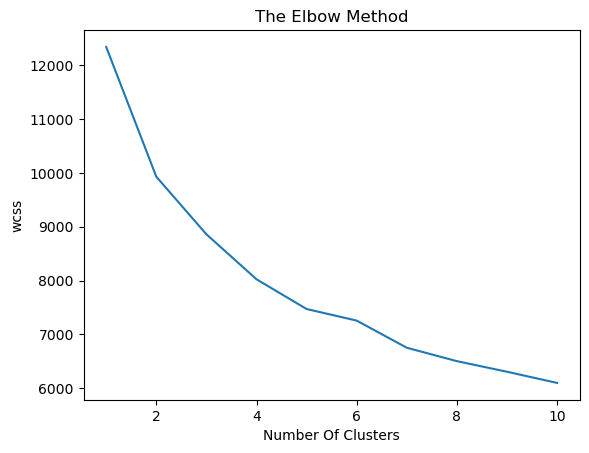

In [33]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('wcss')
plt.show()

- <b>The above graph doesn't have a significant difference among the clusters, which means this is not a ideal data cluster analysis. Lets try it again by using the pca and reducing the dimensions.</b>

In [34]:
pca=PCA(n_components=2).fit(df2_scaled)
pca

PCA(n_components=2)

In [35]:
df2_pca=pca.transform(df2_scaled)
df2_pca

array([[ 2.21956482,  0.57172049],
       [ 2.68907547,  0.08218135],
       [ 2.66851331,  1.55267133],
       ...,
       [-2.17254773, -0.89817802],
       [-2.40444331,  0.01252812],
       [-2.00512304, -1.77282898]])

In [36]:
df2.shape,df2_pca.shape

((1122, 11), (1122, 2))

In [37]:
wcss=[]
for i in range(1,11):
    df2_kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    df2_kmeans.fit(df2_pca)
    wcss.append(df2_kmeans.inertia_)

In [38]:
wcss   

[5380.633871637081,
 2983.853997070694,
 1989.2931198674028,
 1391.4262683589227,
 1158.606235319844,
 969.6574093051321,
 859.8470581471136,
 765.3418409157769,
 685.8253032212612,
 625.0939499265012]

- <b>WCSS is the sum of squares wihin the cluster.</b> 

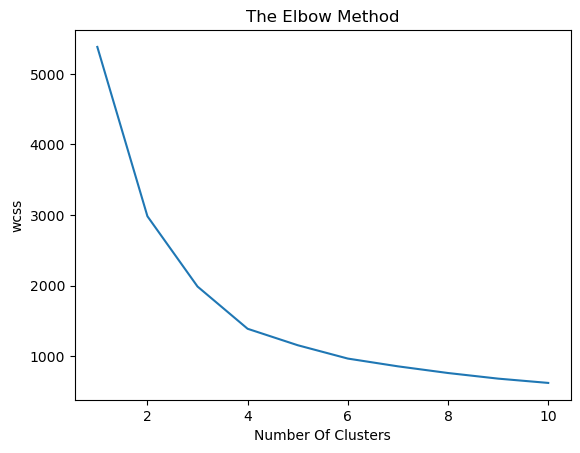

In [39]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('wcss')
plt.show()

- <b>The elbow point on the above graph is near 4. So,the right number of clusters is 4.</b>

In [40]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)

In [41]:
df2_pred=kmeans.fit_predict(df2_pca)
df2_pred

array([1, 1, 1, ..., 3, 3, 3])

In [42]:
df2_pred.shape

(1122,)

In [43]:
centroids=kmeans.cluster_centers_
centroids

array([[-0.85484076,  1.85421384],
       [ 2.31158746,  0.34702541],
       [ 0.29414372, -1.06618595],
       [-1.95642005, -0.4414307 ]])

In [44]:
df2['cluster'] = kmeans.labels_
df2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,valence,popularity,duration_ms,cluster
1,0.326,0.965,-4.803,0.0759,0.4370,0.233000,0.9610,131.455,0.318,34,253173,1
2,0.386,0.969,-4.936,0.1150,0.4160,0.400000,0.9560,130.066,0.313,34,263160,1
4,0.303,0.969,-5.098,0.0930,0.4000,0.055900,0.9660,130.533,0.206,32,305106,1
5,0.340,0.956,-5.539,0.0915,0.2750,0.125000,0.7410,101.628,0.125,31,244293,1
6,0.262,0.810,-6.851,0.0969,0.5610,0.000003,0.9720,77.520,0.394,31,245506,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1605,0.466,0.932,-9.214,0.0429,0.1570,0.006170,0.3240,177.340,0.967,39,154080,2
1606,0.509,0.706,-9.427,0.0843,0.0576,0.000002,0.5160,122.015,0.446,36,245266,2
1607,0.790,0.774,-7.961,0.0720,0.3710,0.000000,0.0669,97.035,0.835,30,176080,3
1608,0.700,0.546,-9.567,0.0622,0.2170,0.000070,0.1660,102.634,0.532,27,121680,3


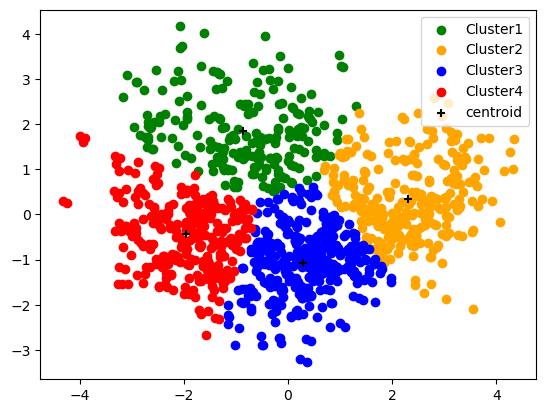

In [45]:
plt.scatter(df2_pca[df2_pred==0,0],df2_pca[df2_pred==0,1],c='green',label='Cluster1')
plt.scatter(df2_pca[df2_pred==1,0],df2_pca[df2_pred==1,1],c='orange',label='Cluster2')
plt.scatter(df2_pca[df2_pred==2,0],df2_pca[df2_pred==2,1],c='blue',label='Cluster3')
plt.scatter(df2_pca[df2_pred==3,0],df2_pca[df2_pred==3,1],c='red',label='Cluster4')
plt.scatter(centroids[:,0],centroids[:,1],c='black',marker='+',label='centroid')
plt.legend()
plt.show()

In [46]:
df2_sil=silhouette_score(df2_pca,df2_pred,metric='euclidean')
df2_sil

0.4018130721337812

- <b>Using KMeans and silhouette_score as the clustering algorithms.</b>